In [24]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error  

In [12]:
#発電データ
df_sola = pd.read_csv('../output/etl_sola.csv',encoding='CP932')
#天気予報データ
df_forecas = pd.read_csv('../output/etl_forecast_kanagawa.csv',encoding='CP932')

In [13]:
#天気予報にNULLのデータを０に更新
df_forecas = df_forecas.applymap(lambda x : 0 if pd.isnull(x) else x)

In [14]:
#発電所「'SOLA01','SOLA03'」の列を削除
df_sola = df_sola.drop(['SOLA01','SOLA03'],axis = 1)
#NULLの行を削除
df_sola = df_sola.dropna()
#SLOA02のデータが0.0から0に変更
df_sola['SOLA02'] = df_sola['SOLA02'].astype(int)

In [15]:
#マージのキー
k_USE_COLS = ['date','M30']#発電データと天気予報データをマージ
df_all = pd.merge(df_sola,df_forecas,on=k_USE_COLS)

In [16]:
#文字項目をONE　HOT
class_le = LabelEncoder()
df_all['we'] = class_le.fit_transform(df_all['we'].values)
df_all['wv'] = class_le.fit_transform(df_all['wv'].values)
df_all['weather'] = class_le.fit_transform(df_all['weather'].values)
df_all['weather_detail'] = class_le.fit_transform(df_all['weather_detail'].values)
df_all['wind'] = class_le.fit_transform(df_all['wind'].values)

In [34]:
#訓練と予測用の項目
#x_USE_COLS = ['M30','D365','we','tp','weather','weather_detail']
x_USE_COLS = ['M30','D365','we','tp']
#予測発電所
y_USE_COLS = ['SOLA02']

#重複データを削除、訓練用データ指定
key_t = df_all.date.drop_duplicates().sample(frac = 0.2)
df_test, df_train = df_all[df_all.date.isin(key_t)],df_all[df_all.date.isin(key_t) == False]

#訓練用データ
X_train = df_train[x_USE_COLS]
Y_train = df_train[y_USE_COLS]

#検証用データ
X_test = df_test[x_USE_COLS]
Y_test = df_test[y_USE_COLS]

In [35]:
#訓練、予測
rfr = RandomForestRegressor()
rfr.n_estimator = 500
rfr.max_depth = 11
rfr.fit(X_train, Y_train)  
rfr_y_predict = rfr.predict(X_test)  
print(rfr.score(X_test, Y_test))
print(mean_absolute_error(Y_test, rfr_y_predict))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.807599080964
288.970152451


In [36]:
df_plt = df_test.copy()
df_plt['predict'] = rfr_y_predict
df_plt.sort_values(by=['date','M30'],inplace=True)

df_plt.head(48)

date  M12  D365 M30  SOLA02  weather  weather_detail  wind  min_tp  \
336  20120109    1     9   1       0        7             107    93       3   
337  20120109    1     9   2       0        7             107    93       3   
338  20120109    1     9   3       0        7             107    93       3   
339  20120109    1     9   4       0        7             107    93       3   
340  20120109    1     9   5       0        7             107    93       3   
341  20120109    1     9   6       0        7             107    93       3   
342  20120109    1     9   7       0        7             107    93       3   
343  20120109    1     9   8       0        7             107    93       3   
344  20120109    1     9   9       0        7             107    93       3   
345  20120109    1     9  10       0        7             107    93       3   
346  20120109    1     9  11       0        7             107    93       3   
347  20120109    1     9  12       0        7             107    93       3   
348  20120109    1     9  13       0        7             107    93       3   
349  20120109    1     9  14       0        7             107    93       3   
350  20120109    1     9  15     280        7             107    93       3   
351  20120109    1     9  16     480        7             107    93       3   
352  20120109    1     9  17    1390        7             107    93       3   
353  20120109    1     9  18    2200        7             107    93       3   
354  20120109    1     9  19    2830        7             107    93       3   
355  20120109    1     9  20    3310        7             107    93       3   
356  20120109    1     9  21    3590        7             107    93       3   
357  20120109    1     9  22    3780        7             107    93       3   
358  20120109    1     9  23    3860        7             107    93       3   
359  20120109    1     9  24    3870        7             107    93       3   
360  20120109    1     9  25    3700        7             107    93       3   
361  20120109    1     9  26    3480        7             107    93       3   
362  20120109    1     9  27    3100        7             107    93       3   
363  20120109    1     9  28    2600        7             107    93       3   
364  20120109    1     9  29    2020        7             107    93       3   
365  20120109    1     9  30    1280        7             107    93       3   
366  20120109    1     9  31     700        7             107    93       3   
367  20120109    1     9  32     310        7             107    93       3   
368  20120109    1     9  33      30        7             107    93       3   
369  20120109    1     9  34       0        7             107    93       3   
370  20120109    1     9  35       0        7             107    93       3   
371  20120109    1     9  36       0        7             107    93       3   
372  20120109    1     9  37       0        7             107    93       3   
373  20120109    1     9  38       0        7             107    93       3   
374  20120109    1     9  39       0        7             107    93       3   
375  20120109    1     9  40       0        7             107    93       3   
376  20120109    1     9  41       0        7             107    93       3   
377  20120109    1     9  42       0        7             107    93       3   
378  20120109    1     9  43       0        7             107    93       3   
379  20120109    1     9  44       0        7             107    93       3   
380  20120109    1     9  45       0        7             107    93       3   
381  20120109    1     9  46       0        7             107    93       3   
382  20120109    1     9  47       0        7             107    93       3   
383  20120109    1     9  48       0        7             107    93       3   

     max_tp  we  tp  wv  wc       wind.1  pc      predict  
336      11   0   5   0   2  北の風　日中　北東の風   0     0.000000  
337      11   0  

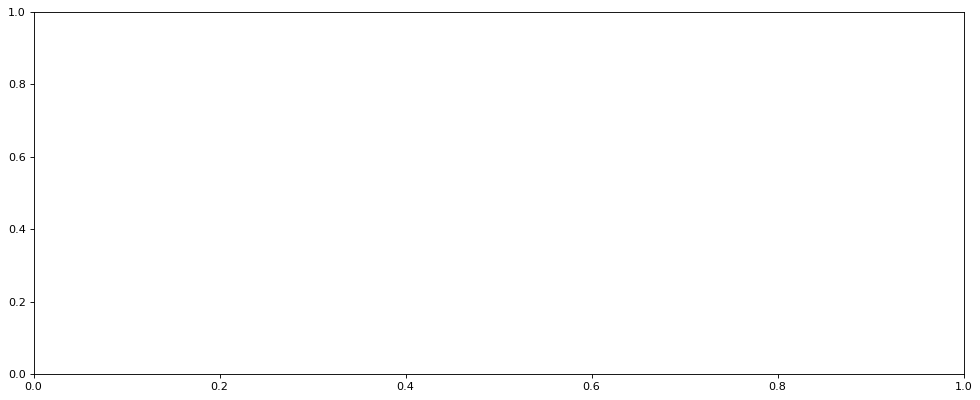

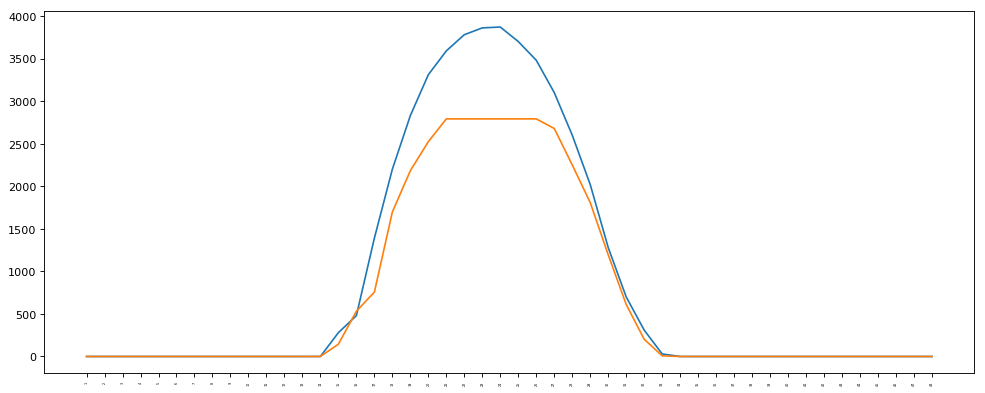

In [38]:
x = list(range(1,49))
y1 = df_plt[df_plt.date == 20120109]['SOLA02']
y2 = df_plt[df_plt.date == 20120109]['predict']

plt.figure(figsize=(15,6),dpi=80)
plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(x,x,size='3',rotation=90)
plt.show()

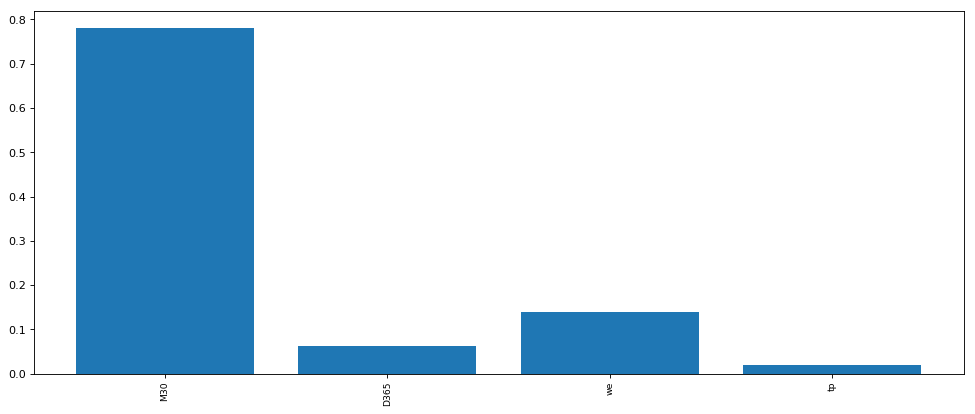

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6),dpi=80)
plt.bar(range(len(rfr.feature_importances_)),rfr.feature_importances_)
plt.xticks(range(len(rfr.feature_importances_)),X_train.columns,size='small',rotation=90)
plt.show()


In [40]:
gbr = GradientBoostingRegressor()  
gbr.max_depth = 5
gbr.fit(X_train, Y_train)  
gbr_y_predict = gbr.predict(X_test)
print(gbr.score(X_test, Y_test)) 
print(mean_absolute_error(Y_test, gbr_y_predict))

0.807116362344
312.354434875
